In [1]:
import os
import tweepy as tw
import pandas as pd
from tqdm import tqdm, notebook

In [2]:
import ast

In [3]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
#nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

In [5]:
Consumer_api_key = 'lqHqMFOyW1GIQkRaKLXU473Zf'
Consumer_api_secret = 'lZz0DWKc0nlMki8HpwJX7yEMULy1DmLGwNgb0dtQzTkdvwApfx'

In [7]:
auth = tw.OAuthHandler(Consumer_api_key, Consumer_api_secret)

In [8]:
api = tw.API(auth, wait_on_rate_limit = True) 

In [13]:
search_words = "#BlackLivesMatter -filter:retweets"
date_since = "2020-01-01"

tweets= tw.Cursor(api.search_tweets, 
                 q= search_words,
                 lang= 'en',
                 since= date_since).items(1500)

In [14]:
tweets_copy =[]
for tweet in tqdm(tweets):
    tweets_copy.append(tweet)

0it [00:00, ?it/s]Unexpected parameter: since
1it [00:01,  1.23s/it]Unexpected parameter: since
16it [00:02,  9.11it/s]Unexpected parameter: since
31it [00:03, 11.21it/s]Unexpected parameter: since
46it [00:04, 11.21it/s]Unexpected parameter: since
60it [00:05, 12.39it/s]Unexpected parameter: since
75it [00:06, 13.47it/s]Unexpected parameter: since
88it [00:09,  7.46it/s]Unexpected parameter: since
103it [00:11,  8.75it/s]Unexpected parameter: since
118it [00:11, 10.33it/s]Unexpected parameter: since
133it [00:12, 11.95it/s]Unexpected parameter: since
148it [00:13, 13.45it/s]Unexpected parameter: since
163it [00:14, 12.52it/s]Unexpected parameter: since
178it [00:15, 13.43it/s]Unexpected parameter: since
193it [00:16, 13.43it/s]Unexpected parameter: since
208it [00:17, 14.04it/s]Unexpected parameter: since
223it [00:18, 14.25it/s]Unexpected parameter: since
238it [00:19, 15.20it/s]Unexpected parameter: since
253it [00:20, 15.85it/s]Unexpected parameter: since
268it [00:21, 16.23it/s]Un

In [15]:
print('Number of tweeets retrieved: ', len(tweets_copy))

Number of tweeets retrieved:  1500


In [16]:
tweets_copy[:5]

[Status(_api=<tweepy.api.API object at 0x00000219D2CEA7C0>, _json={'created_at': 'Fri Feb 04 20:35:52 +0000 2022', 'id': 1489699246765133825, 'id_str': '1489699246765133825', 'text': 'This #BlackHistoryMonth, Turkey, Iran, UAE, &amp; China are using black people for modern-day target practice, and test… https://t.co/Fmso8Kl24P', 'truncated': True, 'entities': {'hashtags': [{'text': 'BlackHistoryMonth', 'indices': [5, 23]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/Fmso8Kl24P', 'expanded_url': 'https://twitter.com/i/web/status/1489699246765133825', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [121, 144]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 14889321

In [17]:
tweets_df= pd.DataFrame()
for tweet in tqdm(tweets_copy):
    hashtags= []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id= tweet.id, tweet_mode = 'extended').full_text
    
    except:
        pass
    tweets_df = tweets_df.append(pd.DataFrame({
        'id': tweet.id,
        'user_name' : tweet.user.name,
        'user_location': tweet.user.location,
        'user_description': tweet.user.description,
        'user_created': tweet.user.created_at,
        'user_followers': tweet.user.followers_count,
        'user_friends': tweet.user.friends_count,
        'user_favourites': tweet.user.favourites_count,
        'user_verified': tweet.user.verified,
        'date': tweet.created_at,
        'text': text,
        'hashtags': [hashtags if hashtags else None],
        'Source': tweet.source,
        'retweets': tweet.retweet_count,
        'favorites': tweet.favorite_count,
        'is_retweet': tweet.retweeted
        
    }))

100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [31:56<00:00,  1.28s/it]


In [18]:
tweets_df.tail()

id       user_name                 user_location  \
0  1489475279223459840         M A N O  Democratic Republic of Congo   
0  1489475217936240640    Kambri Crews                 New York, USA   
0  1489474771301531652           LB014                      Oahu, HI   
0  1489474625608294403     Tigray/ትግራይ                                 
0  1489474330954125312  Nicholas Capet                                 

                                                                                                         user_description  \
0                                                                    #Lakeshow @fcbarcelona @saints    read more/say less   
0  Owner of @QEDAstoria, author of BURN DOWN THE GROUND about my wild childhood w/a Deaf family. https://t.co/B5C2tohsSo.   
0                                                                                             My friends call me whiskers   
0               BUT then,\nWe  Rise\nWe Heal\nWe  Overcame !!!\nResilience , Endurance, and Victory !!\nTigray prevails!!   
0                                   BiPOC 🏳️‍🌈\nLA Based 📍\nPolice Reform, Voting Rights, LGBTQ Rights\n#BlackLivesMatter   

               user_created  user_followers  user_friends  user_favourites  \
0 2020-07-27 10:30:35+00:00             313           616            29534   
0 2008-05-03 00:10:10+00:00            4170           624             6905   
0 2009-03-06 14:32:46+00:00              42           169             7815   
0 2021-03-17 08:18:53+00:00             804           886            13498   
0 2012-03-06 18:28:38+00:00             436          1705            54932   

   user_verified                      date  \
0          False 2022-02-04 05:45:54+00:00   
0          False 2022-02-04 05:45:39+00:00   
0          False 2022-02-04 05:43:53+00:00   
0          False 2022-02-04 05:43:18+00:00   
0          False 2022-02-04 05:42:08+00:00   

                                                                                                                                                                                                                                                                                                           text  \
0                                                             Just to think that some yt pipo benefit till this day from slavery, colonization, apartheid, segregation etc &amp; act as if they aren’t responsible bc they “didn’t do it” is revolting. #BlackHistoryFacts #BlackLivesMatter #Blackhistorymonth   
0                                                                                                                                                   . @elsajustelsa I think this is you in the centerfold pic in the Jan 31 “Ten Years Since Trayvon” #BlackLivesMatter issue of @NYMag https://t.co/QliPbyQdOH   
0             Help this woman by ending institutional racism. #VoteBlue2022 #BLUEWAVE2022 #filibusterfriday #VoteBlueNoMatterWho #blacklivesmatter #stopasianhate #filibusterfriday #Voterizer #vote #Jan6thCommittee #Jan6 #maskholes #SaveDemocracy #VoteBlueNoMatterWho #MitchPlease https://t.co/dfc5Q1czoU   
0                     This #BlackHistoryMonth, the govt of #Ethiopia is still blocking food and medicine from the #Tigray region. 2.2 million people "are suffering an extreme lack of food".\n \n#BlackLivesMatter\n#EndTigraySiege\n \n@TheBlackCaucus @RepKarenBass @JacksonLeeTX18\nhttps://t.co/mJwlRk8sPT   
0  @MaislinJ @SenatorTimScott They was 10 whole seconds from the time they went in until they killed this 22yo. \n\n10 seconds\n\nThe victim was a licensed gun owner. \n\nTHIS is not justice ! Shame\n@amyklobuchar\n@MayorFrey  \n#JusticeForAmirLocke \n#BlackLivesMatter \n#Police https://t.co/ls7SdoqFgO   

                                                              hashtags  \
0                                                                 None   
0                                                   [BlackLivesMatter]   
0  [VoteBlue2022, BLUEWAV

In [20]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Aprils\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

In [21]:
words = set(nltk.corpus.words.words())

In [22]:
def cleaner(tweet):
    tweet= re.sub("@[A-Za-z0-9] +", "", tweet)
    tweet= re.sub(r"(?:\@|http?\://|https?\://|www) \S+", "", tweet)
    tweet = " ".join(tweet.split())
    tweet = tweet.replace("#", "").replace("_", " ")
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet)
                    if w.lower() in words or not w.isalpha())
    return tweet
    

In [23]:
tweets_df['clean_tweets'] = tweets_df['text'].apply(cleaner)

In [24]:
tweets_df.head()

id                         user_name    user_location  \
0  1489699246765133825                            ABRSH⏰                    
0  1489699197464891395                Christen Dannielle    Riverside, CA   
0  1489698833059794949                 Christian Premont                    
0  1489698757352505351  Minnesota Poor People’s Campaign  Minneapolis, MN   
0  1489698676859670529                  Black Mothers BF          Detroit   

                                                                                                                                            user_description  \
0                                                                                                         To be a voice for my people by exposing the truth.   
0                   HBCU Made ✊🏾 B.S. Organizational Management 👩‍💻 Future Master of Legal Studies 📚 Future Constitutional Lawyer, J.D. 👩🏽‍⚖️ Photographer 📸   
0                                                                                       Père de famille, enseignant, syndicaliste et passionné de politique.   
0  A moral, fusion movement to save soul of USA! #PoorPeoplesCampaign originally started by #MLK in 1968! Join PPC in DC on 6/18/22: https://t.co/rJM6X3Wxly   
0                     Black Mothers Breastfeeding Association, reducing inequities in breastfeeding support for black families. Donate by clicking the link.   

               user_created  user_followers  user_friends  user_favourites  \
0 2022-02-02 17:48:05+00:00             138           159               39   
0 2010-11-16 23:14:47+00:00             177           435              136   
0 2019-02-23 16:07:15+00:00              75           286             1885   
0 2018-04-25 20:51:59+00:00            1095           652            20449   
0 2011-04-19 00:50:21+00:00            5589          1406             1467   

   user_verified                      date  \
0          False 2022-02-04 20:35:52+00:00   
0          False 2022-02-04 20:35:40+00:00   
0          False 2022-02-04 20:34:13+00:00   
0          False 2022-02-04 20:33:55+00:00   
0          False 2022-02-04 20:33:36+00:00   

                                                                                                                                                                                                                                                                                     text  \
0   This #BlackHistoryMonth, Turkey, Iran, UAE, &amp; China are using black people for modern-day target practice, and testing out their drone technology on civilians in the #Tigray region of #Ethiopia. #BlackLivesMatter @_AfricanUnion @USUN @TheBlackCaucus https://t.co/3egzugb3xW   
0  @BernieSanders You came to Battle Creek for the @KelloggsUS workers now we need you so we can get #Justice4Zay They are letting the shooter walk because he is associated with city officials #BlackLivesMatter #BlackHistoryMonth \n\nhttps://t.co/VB9PuwIbu1 https://t.co/hNSBHIIIJK   
0                                                                                            Again, I wonder if the authorities would tolerate this if it was a protest by #BlackLivesMatter or #FirstNations ? Somehow I doupt it... What is the difference?.... https://t.co/rIpDlXgUZm   
0                                                                          UPDATE: Fatal Police Shooting of Amir Locke\n\n#AmirLocke #JusticeForAmirLock #BlackLivesMatter #FightWhiteSupremacy #PoliceReformNow  #BlackHistoryMonth #Minneapolis #MplsPolice \n\nhttps://t.co/9r4e573lDL   
0                  (3/3) What comes to your mind when you think of Black history? \n#blacklivesmatter #blackhistorymonth #detroitmichigan #detroit #michigan #motherhood #postpartum #doula #doulasupport #blackmothers #blackmoms #people #culture #medicine #healthcare #maternalhealth   

                                                                 hashtags  \
0                                                     [BlackHi

In [25]:
word_dict= {'pissed': -1, 'bemused': '1', 'cancel culture': '-1'}

In [28]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Aprils\AppData\Roaming\nltk_data...


True

In [29]:
sid= SentimentIntensityAnalyzer()
sid.lexicon.update(word_dict)

In [30]:
list_1= []
for i in tweets_df['clean_tweets']:
    list_1.append((sid.polarity_scores(str(i)))['compound'])

In [31]:
list_1[:10]

[0.0, -0.3818, -0.3313, -0.5423, 0.0, -0.5423, 0.0, 0.0, 0.0, 0.4404]

In [33]:
tweets_df['sentiment'] = list_1

In [34]:
def sentiment_category(sentiment):
    label = ''
    if(sentiment>0):
        label = 'positive'
    elif (sentiment == 0):
        label = 'neutral'
    else:
        label = 'negative'
    return (label)

In [35]:
tweets_df['sentiment_category'] = tweets_df['sentiment'].apply(sentiment_category)

In [36]:
tweets_df

id                                           user_name  \
0  1489699246765133825                                              ABRSH⏰   
0  1489699197464891395                                  Christen Dannielle   
0  1489698833059794949                                   Christian Premont   
0  1489698757352505351                    Minnesota Poor People’s Campaign   
0  1489698676859670529                                    Black Mothers BF   
0  1489698566624923658      Viv Henry(END silencing of Mental Health Pros)   
0  1489698509146238989                                          Jeff Brand   
0  1489698312873725959                                    Police Brutality   
0  1489698056710807556                                           Veedus M.   
0  1489698007322963975                                                 Sam   
0  1489697942109929474                                                BK 🌱   
0  1489697872757071878                                            Asmelash   
0  1489697810014429190                              Firecracker Department   
0  1489697744088350733                                            Asmelash   
0  1489697660466573312                                       Yonas Shumuye   
0  1489697629042847747                                       Yonas Shumuye   
0  1489697498960523265                                       Grace Ann 🇺🇸🐾   
0  1489697382262616064                                       Hayelom Berhe   
0  1489697343213428737                                              Olaina   
0  1489697193095143424                                             Coco Du   
0  1489697124640038916                                       Hayelom Berhe   
0  1489697109204897793                                  Christen Dannielle   
0  1489697074471919618                             メカれね ✨COMMISSIONS SOON✨   
0  1489697034529615874                                        Robert Owens   
0  1489696803658346501                            LGBTQ+ Health Initiative   
0  1489696699295666181                                        504HealthNet   
0  1489696682224857096                                   #BlackLivesMatter   
0  1489696653976252418                                  Habon Abdulle, PhD   
0  1489696174722490376                                     Mary Jordan 👸🏾🥀   
0  1489696088483192836                                     The Litty Store   
0  1489696028869623809                                  Christen Dannielle   
0  1489696016018247681                                  Ian Thomas Wheeler   
0  1489695911752220680                                         Seloda Adua   
0  1489695894110883842                                     Motherofkittens   
0  1489695826679005184                                           @getvurbl   
0  1489695818403753990                                     katie feldman 🐘   
0  1489695693593841671                                         Seloda Adua   
0  1489695677076717575                                              ZazaFL   
0  1489695592506970112                                         D r a k e 👑   
0  1489695504745340932                                   THE NOTORIOUS BOB   
0  1489695406514749443                                             hit mun   
0  1489694908696829953                         Ian Landy (he/him - AZ/M/M)   
0  1489694856914116610                             BlackEssencePersonified   
0  1489694610779746310                                     katie feldman 🐘   
0  1489694524427231235                                      Awesomeaurroua   
0  1489694433729814532                                      The Moth Rules   
0  1489694382815166466                                          Aimar 🇧🇯🇳🇬   
0  1489694273503207424                                              Rigbe💊   
0  1489694216292913156                                              Rigbe💊   
0  1489694057802743808                                              Dopest   
0  1489693819759116295                    

In [37]:
tweets_df['sentiment_category'].value_counts()

neutral     582
negative    547
positive    371
Name: sentiment_category, dtype: int64

In [38]:
import matplotlib.pyplot as plt

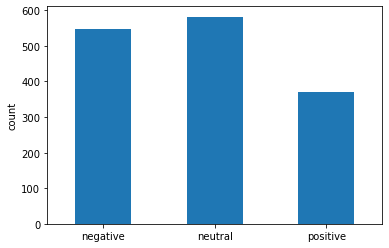

In [39]:
tweets_df['sentiment_category'].value_counts().sort_index().plot(kind='bar', rot=0, ylabel='count')
plt.show()